In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

#30%GPU
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.Session(config=config)

# session
KTF.set_session(session )
#%%%

Using TensorFlow backend.


In [3]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
K.set_learning_phase(1)

from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from function import newtxt,newimagedata,create_plots,plot_confusion_matrix,cnn_model,cnn_model1,cnn_model2
import glob
from skimage.io import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import os
from keras import backend as K
from sklearn.cluster import MiniBatchKMeans,KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
import lda
import time

In [4]:
def read_generate_data(txtfolder_name,imagefloder_name,image_x,image_y):
    all_count = 1
    all_label = np.zeros(1,dtype=np.int)
    image_data = np.zeros([1,30,30,3],dtype=np.uint8)
    read_files = glob.glob(str('./')+txtfolder_name+str('/*.txt'))
    for name in read_files:
        name = name.split("/")[2]
        name = name.split(".")[0]
        path_txt = str('./')+txtfolder_name+str('/')+name+str('.txt')
        path_image = str('./')+ imagefloder_name+str('/')+name+str('.jpg')
        new_image_data,label = generate_signal_imagedata(path_txt,path_image,image_x,image_y)
        all_label = np.hstack((all_label,label))
        image_data = np.vstack((image_data,new_image_data))
        print("Image {0} is finish ".format(all_count))
        all_count = all_count+1
    final_data = image_data[1:,:,:,:]
    final_label = all_label[1:]
    return final_data,final_label

def generate_signal_imagedata(path_txt,path_image,image_x,image_y):
    txt_file = open(path_txt)
    text = txt_file.readlines()[2:]
    count_points = len(text)
    
    crop_length = 30
    crop_width = 30
    all_image = np.zeros([count_points,crop_length,crop_width,3],dtype=np.uint8)
    label = np.zeros(count_points,dtype=np.int)
    crop_x = int(crop_length/2)
    crop_y = int(crop_width/2)
    image = imread(path_image)
    for i in range(count_points):
        text_piece = text[i]
        text_element = text_piece.split(',')
        l_x = int(float(text_element[0]))
        l_y = int(float(text_element[1]))
        label[i] = int(text_element[2])
        if(l_x-crop_x <0):
            l_x = crop_x
        if(l_y-crop_y <0):
            l_y = crop_y
        if(l_x+crop_x >image_y):
            l_x = image_y-15
        if(l_y+crop_y >image_x):
            l_y =image_x-15
        all_image[i,:,:,:] = image[l_y-15:l_y+15,l_x-15:l_x+15]
    txt_file.close()
    return all_image,label

def mean_category(data,label,category):
    h = np.where(label==category)
    g = data[h,:,:,:]
    g = g[0]
    f = np.mean(g, axis=0)
    f = np.uint8(f)
    return f

In [5]:
data2012_data,data2012_label = read_generate_data('2012area','2012image',1536,2048)
data2012_raw_data,data2012_raw_label = read_generate_data('2012raw_data','2012image',1536,2048)
data2012_data = np.vstack((data2012_data,data2012_raw_data))
data2012_label = np.hstack((data2012_label,data2012_raw_label))

Image 1 is finish 
Image 2 is finish 
Image 3 is finish 
Image 4 is finish 
Image 5 is finish 
Image 6 is finish 
Image 7 is finish 
Image 8 is finish 
Image 9 is finish 
Image 10 is finish 
Image 11 is finish 
Image 12 is finish 
Image 13 is finish 
Image 14 is finish 
Image 15 is finish 
Image 16 is finish 
Image 17 is finish 
Image 18 is finish 
Image 19 is finish 
Image 20 is finish 
Image 21 is finish 
Image 22 is finish 
Image 23 is finish 
Image 24 is finish 
Image 25 is finish 
Image 26 is finish 
Image 27 is finish 
Image 28 is finish 
Image 29 is finish 
Image 30 is finish 
Image 31 is finish 
Image 32 is finish 
Image 33 is finish 
Image 34 is finish 
Image 35 is finish 
Image 36 is finish 
Image 37 is finish 
Image 38 is finish 
Image 39 is finish 
Image 40 is finish 
Image 41 is finish 
Image 42 is finish 
Image 43 is finish 
Image 44 is finish 
Image 45 is finish 
Image 46 is finish 
Image 47 is finish 
Image 48 is finish 
Image 49 is finish 
Image 50 is finish 
Image 51 

In [6]:
#%%
## divide all images into many patches, 
## the size of the patch is 30*30, the size of image is 2048*1536
## so the size of all_divide_image array is (120*3468)*30*30*3
x = np.arange(0,1536 - 30+1, 30)
y = np.arange(0,2048 - 30+1, 30)
X,Y = np.meshgrid(x, y)
def fun(x,y):
    m = single_img[x:x+30,y:y+30]
    m = m.reshape(2700)
    return m

count = 0
all_divide_image = np.zeros([1,30,30,3])
read_files = glob.glob("./2012raw_data/*.txt")
for name in read_files:
    name = name.split("/")[2]
    name = name.split(".")[0]
    path_image = str('./2012image/')+name+str('.jpg')
    single_img = imread(path_image)
    check_palindrome = np.frompyfunc(fun, 2, 1)
    zs= check_palindrome(np.ravel(X.T), np.ravel(Y.T))
    fs = np.concatenate(zs,axis=0).astype(np.uint16)
    divide_image = fs.reshape(-1,30,30,3)/255
    all_divide_image = np.vstack((all_divide_image,divide_image))
    count = count + 1
    print("---image %d finished" % (count))
#get the size of all_patch_image
all_patch_image = all_divide_image[1:]
print("finished construct patches")

---image 1 finished
---image 2 finished
---image 3 finished
---image 4 finished
---image 5 finished
---image 6 finished
---image 7 finished
---image 8 finished
---image 9 finished
---image 10 finished
---image 11 finished
---image 12 finished
---image 13 finished
---image 14 finished
---image 15 finished
---image 16 finished
---image 17 finished
---image 18 finished
---image 19 finished
---image 20 finished
---image 21 finished
---image 22 finished
---image 23 finished
---image 24 finished
---image 25 finished
---image 26 finished
---image 27 finished
---image 28 finished
---image 29 finished
---image 30 finished
---image 31 finished
---image 32 finished
---image 33 finished
---image 34 finished
---image 35 finished
---image 36 finished
---image 37 finished
---image 38 finished
---image 39 finished
---image 40 finished
---image 41 finished
---image 42 finished
---image 43 finished
---image 44 finished
---image 45 finished
---image 46 finished
---image 47 finished
---image 48 finished
-

In [7]:
#plt.imshow(np.uint8(all_patch_image[0]))
all_patch_image[0]

array([[[0.62352941, 0.41960784, 0.37647059],
        [0.61960784, 0.41176471, 0.38039216],
        [0.61176471, 0.41568627, 0.38039216],
        ...,
        [0.63921569, 0.43137255, 0.4       ],
        [0.63529412, 0.43921569, 0.39607843],
        [0.63137255, 0.43529412, 0.39215686]],

       [[0.60784314, 0.41960784, 0.38039216],
        [0.60392157, 0.41568627, 0.37647059],
        [0.60392157, 0.41176471, 0.38431373],
        ...,
        [0.63137255, 0.43529412, 0.4       ],
        [0.62745098, 0.43921569, 0.4       ],
        [0.62352941, 0.43529412, 0.38823529]],

       [[0.59607843, 0.42352941, 0.38823529],
        [0.59215686, 0.41960784, 0.38431373],
        [0.59215686, 0.41960784, 0.38431373],
        ...,
        [0.62352941, 0.43921569, 0.4       ],
        [0.61568627, 0.43137255, 0.39215686],
        [0.60784314, 0.42745098, 0.37647059]],

       ...,

       [[0.6627451 , 0.43921569, 0.37254902],
        [0.6627451 , 0.43921569, 0.37254902],
        [0.6627451 , 0

In [38]:
#load the pre-train CNN model and regard the output of last convolutional layers as feature
model = cnn_model()
model.load_weights('model_weight/2019.h5')
cnn_layer_model = Model(inputs=model.input,
                                     outputs=model.layers[19].output)

# get the feature of pre-train CNN model
all_cnn_output = cnn_layer_model.predict(all_patch_image,verbose=1)
print("get the result of CNN")

416160/416160 [==============================] - 74s 179us/step
get the result of CNN


In [39]:
pca_number = 32
number_cluster = 500
pca = PCA(n_components=pca_number)
pca.fit(all_cnn_output)
#using PCA to reduce the dimension: from 512 to 28
all_output_reduced = pca.transform(all_cnn_output)
print("PCA finished")
#using k-mean to reduce the size of codebook from 416160 to 500
kmeans = MiniBatchKMeans(n_clusters=number_cluster,
        random_state=0,
        batch_size=50000,
        max_iter=500).fit(all_output_reduced)
print("K_means finished")

PCA finished
K_means finished


In [40]:
code_book = kmeans.cluster_centers_
d = kmeans.predict(all_output_reduced)
#calculate the frequence of each centers in the codebook matrix
all_frequence = np.zeros([120,number_cluster])
for j in range(120):
    label_image = d[j*3468:(j+1)*3468]
    k = label_image.tolist()
    h = Counter(k)
    frequence_image = np.zeros(number_cluster)
    for i in range(number_cluster):
        frequence_image[i] = h[i]
    all_frequence[j] = frequence_image
    print("---image %d finished" % (j))

---image 0 finished
---image 1 finished
---image 2 finished
---image 3 finished
---image 4 finished
---image 5 finished
---image 6 finished
---image 7 finished
---image 8 finished
---image 9 finished
---image 10 finished
---image 11 finished
---image 12 finished
---image 13 finished
---image 14 finished
---image 15 finished
---image 16 finished
---image 17 finished
---image 18 finished
---image 19 finished
---image 20 finished
---image 21 finished
---image 22 finished
---image 23 finished
---image 24 finished
---image 25 finished
---image 26 finished
---image 27 finished
---image 28 finished
---image 29 finished
---image 30 finished
---image 31 finished
---image 32 finished
---image 33 finished
---image 34 finished
---image 35 finished
---image 36 finished
---image 37 finished
---image 38 finished
---image 39 finished
---image 40 finished
---image 41 finished
---image 42 finished
---image 43 finished
---image 44 finished
---image 45 finished
---image 46 finished
---image 47 finished
--

In [41]:
all_frequence = all_frequence.astype(np.int32)
#LDA_model = lda.LDA(n_topics=5, n_iter=1000, random_state=1)
LDA_model = LatentDirichletAllocation(batch_size=256,n_components=5,max_iter=500,random_state=0)
#LDA_model.fit(all_frequence)
tt = LDA_model.fit_transform(all_frequence)
#tt = LDA_model.doc_topic_

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 0.230157
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.438122
[t-SNE] KL divergence after 1000 iterations: 0.285105


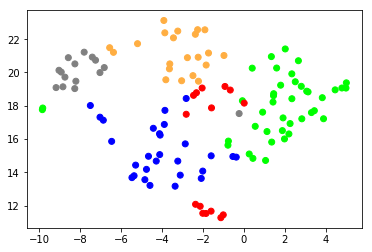

In [42]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components =2, verbose =1, random_state =0, angle =.99, init='pca')
tsne_lda = tsne_model .fit_transform(tt)
colormap = np .array(["#00ff00", "#ff0000", "#808080", "#0000ff", "#ffae42"
                      ])
lda_keys = []
for i in range(tt .shape[0]):
    lda_keys += tt[i] .argmax(),

num_example = len(tt)

plt.scatter(tsne_lda[:, 0],tsne_lda[:, 1],color =colormap[lda_keys][:num_example])

In [43]:
topic_word = LDA_model.components_ / LDA_model.components_.sum(axis=1)[:, np.newaxis]

In [44]:
topic_word.shape

(5, 500)

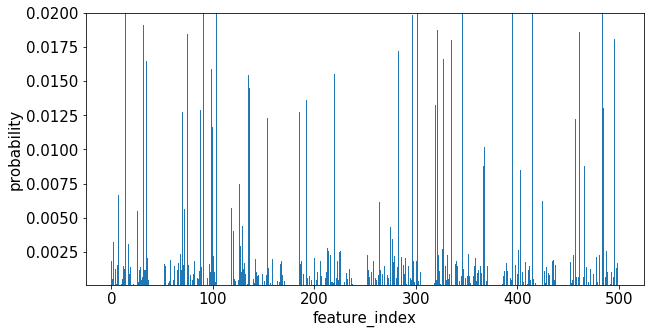

In [45]:
import numpy as np
# the number of k_mean
x = np.arange(number_cluster)

plt.figure(figsize=(10,5))
plt.ylim(0.0001,0.02)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(x, topic_word[1,:])
plt.xlabel('feature_index', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.savefig("topic1.pdf")
plt.show()

In [16]:
value = np.zeros([6,5])
mean_label = np.zeros(5)
for j in range(6):
    mean_label = mean_category(data2012_data,data2012_label,j)
    mean_label = mean_label.reshape(1,30,30,3)/255
    mean_cnn = cnn_layer_model.predict(mean_label,verbose=2)
    mean_reduced = pca.transform(mean_cnn)
    for i in range(5):
        topic = topic_word[i]
        topic = topic.reshape(1,number_cluster)
        f = topic@code_book
        value[j,i] = ((f - mean_reduced)**2).mean(axis=1)

In [17]:
value

array([[0.44882173, 0.56977683, 0.32404675, 0.22412501, 0.39095461],
       [0.40036618, 0.5431755 , 0.29199149, 0.20396603, 0.35284011],
       [0.39573888, 0.5964471 , 0.19433408, 0.1466962 , 0.24199263],
       [1.07757375, 1.17315217, 0.66041579, 0.48866826, 0.73436689],
       [0.04396658, 0.01814094, 0.36950638, 0.40909998, 0.39309425],
       [0.51296363, 0.69398828, 0.27278991, 0.18320017, 0.33011011]])

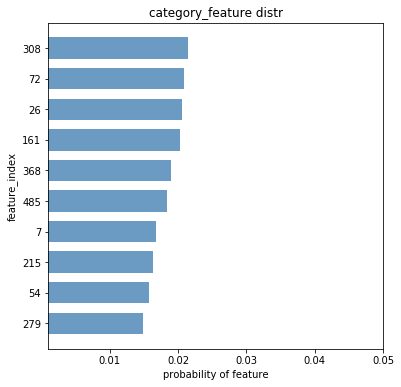

In [46]:
#%% plot the historgram of the higher probability
n_top_words = 10
index_coral = int(np.where(value == np.min(value[0]))[1])
high_prob = np.zeros(n_top_words)
hi = topic_word[index_coral]

word_idx = np.argsort(topic_word[index_coral])[::-1][:n_top_words]
word_inverse = word_idx[::-1]
for j in range(n_top_words):
    index = word_inverse[j]
    high_prob[j] = hi[index]

high_list = list(high_prob)
#f, ax= plt.subplots(5, 1, figsize=(10, 15), sharex=True)
plt.figure(figsize=(6,6))
plt.barh(range(n_top_words), high_list, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(n_top_words), [str(word_inverse[n]) for n in range(n_top_words)])
plt.xlim(0.001,0.05)
plt.xlabel("probability of feature")
plt.ylabel("feature_index")
plt.title("category_feature distr")
plt.savefig('./visualization_LDA/higher_feature.pdf')
plt.show()

In [20]:
word_inverse = np.zeros([5,n_top_words])
for i in range(5):
    index_coral = int(np.where(value == np.min(value[i]))[1])
    high_prob = np.zeros(n_top_words)
    hi = topic_word[index_coral]

    word_idx = np.argsort(topic_word[index_coral])[::-1][:n_top_words]
    word_inverse[i] = word_idx[::-1]
#word_idx = np.argsort(topic_word[index_coral])[::-1][:n_top_words]
#word_inverse = word_idx[::-1]

In [21]:
word_inverse

array([[418.,  43.,  61., 408., 154., 444., 299.,  51., 327., 128.],
       [418.,  43.,  61., 408., 154., 444., 299.,  51., 327., 128.],
       [418.,  43.,  61., 408., 154., 444., 299.,  51., 327., 128.],
       [418.,  43.,  61., 408., 154., 444., 299.,  51., 327., 128.],
       [206.,  23., 159., 118., 467., 442., 355., 386.,  15., 232.]])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.001482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.630577
[t-SNE] KL divergence after 1000 iterations: 0.475758


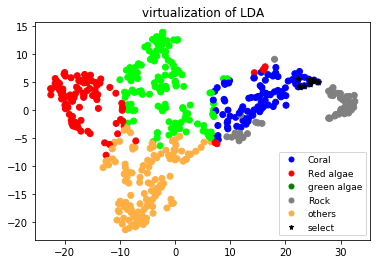

In [47]:
#topic_word = LDA_model.topic_word_
#red: #ff0000; green: #00ff00; blue: #0000ff; gray:#808080; yellow:#ffae42
colormap = np .array(["#ffae42", "#808080","#ff0000","#0000ff", "#00ff00"
                      ])
label_category = np.array(["coral","red algae","green algae","rock","others"])
topic_word_trans = topic_word.T
#threshold = 0.01
#idx = np.max(topic_word_trans, axis =1) > threshold
#topic_word_trans = topic_word_trans[idx]
#%%%%
lda_news = []
for i in range(topic_word_trans .shape[0]):
    lda_news += topic_word_trans[i] .argmax(),
topic_word_trans_tsne = tsne_model .fit_transform(topic_word_trans)
num_new = len(topic_word_trans)
plt.scatter(topic_word_trans_tsne[:, 0],topic_word_trans_tsne[:, 1],color = colormap[lda_news][:num_new])
for i in word_inverse:
    plt.scatter(topic_word_trans_tsne[i, 0],topic_word_trans_tsne[i, 1],color = 'k', marker='*')

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#%matplotlib inline
colors = ["blue","red","green", "gray","#ffae42","black"]
texts = ["Coral", "Red algae", "green algae", "Rock", "others","select"]
markers = ["o","o","o","o","o","*"]
patches = [ plt.plot([],[], marker="{:s}".format(markers[i]), ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]))[0]  for i in range(len(texts)) ]

#colors = ["blue","red","green", "gray","#ffae42"]
#texts = ["Coral", "Red algae", "green algae", "Rock", "others"]
#patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            #label="{:s}".format(texts[i]))[0]  for i in range(len(texts)) ]
plt.legend(handles=patches)
plt.rcParams["legend.fontsize"] = 9


plt.title('virtualization of LDA')
plt.savefig('./visualization_LDA/vis_cluster_LDA_1.pdf')
plt.show() 


In [49]:
def lda_fun(x,y):
    m = test_image[x:x+30,y:y+30]
    m = m.reshape(2700)
    return m
def get_feature(stride,test_image):
    check_palindrome = np.frompyfunc(lda_fun, 2, 1)
    x = np.arange(0,test_image.shape[0] - 30+1, stride)
    y = np.arange(0,test_image.shape[1] - 30+1, stride)
    X,Y = np.meshgrid(x, y)
    zs = check_palindrome(np.ravel(X.T), np.ravel(Y.T))
    fs = np.concatenate(zs,axis=0).astype(np.uint8)
    test_all_patches = fs.reshape(-1,30,30,3)/255 #(84924,30,30,3)
    cnn_feature = cnn_layer_model.predict(test_all_patches,verbose=2) #(84924,512)
    feature_reduced = pca.transform(cnn_feature) #(84924,28)
    return feature_reduced


In [68]:
import heapq
category_index = int(np.where(value==min(value[0,:]))[1])
word_idx = np.argsort(topic_word[2])[::-1][0:1]
image_path = ("./2012image/201208172_T-12-58-58_Dive_01_041.jpg")
name = image_path.split('/')[2]
name_image = name.split('.')[0]
test_image = imread(image_path)
fea_redu = get_feature(30,test_image)
highest_feature = code_book[int(word_idx)]
g_feature = ((fea_redu-highest_feature)**2).mean(axis=1)
g = list(g_feature)
re2 = map(g.index, heapq.nsmallest(500, g))
a = list(re2)
a = np.array(a)
index_x = a//68
index_y = a%68

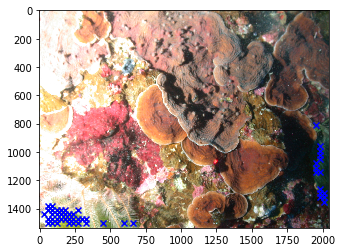

In [69]:
for i in range(0,50):
    plt.scatter(index_y[i]*30,index_x[i]*30,c = 'b',marker = 'x')
plt.imshow(test_image)

In [152]:
new.shape

NameError: name 'new' is not defined

In [97]:
number_cluster

256

In [86]:
category_index

2

In [87]:
word_idx

array([157])

In [122]:
index_coral

3